# Predict Accidents 

## Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.impute import KNNImputer
import warnings
import statistics as s
warnings.filterwarnings("ignore")

## Import Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/accidents-in-france-from-2005-to-2016/vehicles.csv
/kaggle/input/accidents-in-france-from-2005-to-2016/holidays.csv
/kaggle/input/accidents-in-france-from-2005-to-2016/users.csv
/kaggle/input/accidents-in-france-from-2005-to-2016/places.csv
/kaggle/input/accidents-in-france-from-2005-to-2016/caracteristics.csv


In [3]:
dirname_caracteristics = '/kaggle/input/accidents-in-france-from-2005-to-2016/caracteristics.csv'
df_caracteristics = pd.read_csv(dirname_caracteristics, encoding = 'latin-1')

In [4]:
dirname_places = '/kaggle/input/accidents-in-france-from-2005-to-2016/places.csv'
df_places = pd.read_csv(dirname_places)

In [5]:
dirname_users = '/kaggle/input/accidents-in-france-from-2005-to-2016/users.csv'
df_users = pd.read_csv(dirname_users)

# Describe Tables 

### <center> caracteristics table

In [6]:
df_caracteristics

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,416.0,"sans, LEBLOND(RUE M. ET",NaN,NaN,NaN,974
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,416.0,"SANS, PRESIDENT MITTERAN",NaN,NaN,NaN,974
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,416.0,"SANS, LEBLOND(RUE M. ET",NaN,NaN,NaN,974
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,416.0,"SANS, HUBERT DE LISLE(BO",NaN,NaN,NaN,974


In [7]:
df_caracteristics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   an       839985 non-null  int64  
 2   mois     839985 non-null  int64  
 3   jour     839985 non-null  int64  
 4   hrmn     839985 non-null  int64  
 5   lum      839985 non-null  int64  
 6   agg      839985 non-null  int64  
 7   int      839985 non-null  int64  
 8   atm      839930 non-null  float64
 9   col      839974 non-null  float64
 10  com      839983 non-null  float64
 11  adr      699443 non-null  object 
 12  gps      366226 non-null  object 
 13  lat      362471 non-null  float64
 14  long     362467 non-null  object 
 15  dep      839985 non-null  int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 102.5+ MB


### <center> Users table

In [8]:
df_users

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
1876000,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1972.0,B01
1876001,200500087953,1.0,1,1,1,0.0,13.0,0.0,0.0,0.0,1965.0,C01
1876002,200500087953,1.0,1,4,1,5.0,23.0,0.0,0.0,0.0,1990.0,A01
1876003,200500087954,1.0,1,4,1,0.0,13.0,0.0,0.0,0.0,1951.0,A01


In [9]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876005 entries, 0 to 1876004
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Num_Acc  int64  
 1   place    float64
 2   catu     int64  
 3   grav     int64  
 4   sexe     int64  
 5   trajet   float64
 6   secu     float64
 7   locp     float64
 8   actp     float64
 9   etatp    float64
 10  an_nais  float64
 11  num_veh  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 171.8+ MB


### <center> Places table

In [10]:
df_places

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,4.0,0.0,0.0,NaN,2.0,3.0,NaN,NaN,0.0,1.0,1.0,0.0,80.0,1.0,0.0,1.0,3.0
839981,200500087951,4.0,0.0,0.0,NaN,2.0,2.0,NaN,NaN,0.0,1.0,2.0,0.0,70.0,1.0,0.0,1.0,0.0
839982,200500087952,4.0,0.0,0.0,NaN,1.0,2.0,NaN,NaN,0.0,1.0,1.0,0.0,75.0,1.0,0.0,1.0,3.0
839983,200500087953,4.0,0.0,0.0,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,150.0,1.0,0.0,1.0,0.0


In [11]:
df_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   voie     780914 non-null  object 
 3   v1       332816 non-null  float64
 4   v2       33953 non-null   object 
 5   circ     839187 non-null  float64
 6   nbv      838195 non-null  float64
 7   pr       414770 non-null  float64
 8   pr1      413463 non-null  float64
 9   vosp     838345 non-null  float64
 10  prof     838924 non-null  float64
 11  plan     838909 non-null  float64
 12  lartpc   830440 non-null  float64
 13  larrout  831706 non-null  float64
 14  surf     838968 non-null  float64
 15  infra    838707 non-null  float64
 16  situ     838983 non-null  float64
 17  env1     838709 non-null  float64
dtypes: float64(15), int64(1), object(2)
memory usage: 115.4+ MB


#### Compare nombre of accident 
in this case we remark that both "Caracteristics" and "Places" have the same number of accident.
However "Users" had "1876005" accident , we conclude one user had more than one accident.

In [12]:
df_caracteristics["Num_Acc"].count()

839985

In [13]:
df_places["Num_Acc"].count()

839985

In [14]:
df_users["Num_Acc"].count()

1876005

# Preprocessing
Before chose module of machine learning we should drop useless column in this predict and clean data from Nan value and zero values.

### 1- Caracteristics :

In [15]:
df_caracteristics.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,dep
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839930.000000,839974.000000,839983.000000,3.624710e+05,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,1381.093505,1.912588,1.685924,1.694066,1.547116,4.187484,186.510172,2.849715e+06,564.257671
std,3.458009e+08,3.458059,3.389489,8.750201,540.757462,1.517900,0.464147,1.510792,1.587668,1.974998,171.873105,2.284591e+06,291.153083
min,2.005000e+11,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,10.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,3.000000,55.000000,0.000000e+00,310.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,1446.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.370200e+06,630.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,278.000000,4.799218e+06,780.000000
max,2.016001e+11,16.000000,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,987.000000,5.564823e+06,976.000000


In [16]:
df_caracteristics = df_caracteristics.drop([ "col", "com", "adr", "gps", "lat", "long", "dep", "agg"], axis=1)
df_caracteristics.head()

,Num_Acc,an,mois,jour,hrmn,lum,int,atm
0,201600000001,16,2,1,1445,1,1,8.0
1,201600000002,16,3,16,1800,1,6,1.0
2,201600000003,16,7,13,1900,1,1,1.0
3,201600000004,16,8,15,1930,2,1,7.0
4,201600000005,16,12,23,1100,1,3,1.0


In [17]:
df_caracteristics.isna().sum()

Num_Acc     0
an          0
mois        0
jour        0
hrmn        0
lum         0
int         0
atm        55
dtype: int64

##### 1-A- Clean "atm" column :

In [18]:
set(df_caracteristics["atm"].unique())

{nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [19]:
df_caracteristics[~df_caracteristics["atm"].isna()].atm

0         8.0
1         1.0
2         1.0
3         7.0
4         1.0
         ... 
839980    1.0
839981    1.0
839982    1.0
839983    2.0
839984    2.0
Name: atm, Length: 839930, dtype: float64

In [20]:
np.median(df_caracteristics[~df_caracteristics["atm"].isna()].atm)

1.0

after search median of "atm" column we can replace "NaN" value with value "1".

In [21]:
df_caracteristics["atm"] = df_caracteristics["atm"].replace(np.NaN, 1)

In [22]:
df_caracteristics["atm"] = df_caracteristics["atm"].astype(int)

In [23]:
set(df_caracteristics["atm"].unique())

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [24]:
df_caracteristics["atm"].isna().sum()

0

##### 1-B-Clean "int" column :

In [25]:
df_caracteristics["int"].isna().sum()

0

In [26]:
set(df_caracteristics["int"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

<p>Let's change values of type of intersection column to simplify choose.</p>                                                   <p>if we have 1 let's change it to 0 that mean Out of intersection and others number {2, 3, 4, 5, 6, 7, 8, 9} we change it to 1 In of intersection</p>

In [27]:
def convert_int(x):
    if x == 1:
        return 0
    else:
        return 1

In [28]:
df_caracteristics["int"] = df_caracteristics["int"].apply(convert_int)

In [29]:
set(df_caracteristics["int"])

{0, 1}

<AxesSubplot:>

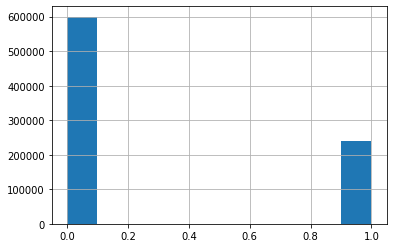

In [30]:
df_caracteristics["int"].hist()

In [31]:
df_caracteristics["hrmn"] = df_caracteristics["hrmn"].div(100).apply(np.floor)

In [32]:
df_caracteristics["hrmn"] = df_caracteristics["hrmn"].astype(int)

<AxesSubplot:>

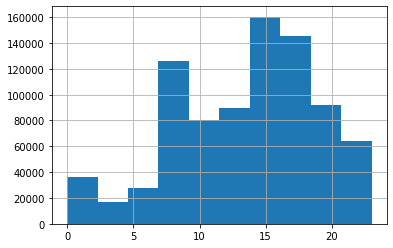

In [33]:
df_caracteristics["hrmn"].hist()

In [34]:
df_caracteristics

,Num_Acc,an,mois,jour,hrmn,lum,int,atm
0,201600000001,16,2,1,14,1,0,8
1,201600000002,16,3,16,18,1,1,1
2,201600000003,16,7,13,19,1,0,1
3,201600000004,16,8,15,19,2,0,7
4,201600000005,16,12,23,11,1,1,1
...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,20,5,1,1
839981,200500087951,5,12,23,10,1,0,1
839982,200500087952,5,12,26,17,1,1,1
839983,200500087953,5,12,27,15,1,1,2


### 2- Users :

In [35]:
df_users.describe()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
count,1.876005e+06,1.775639e+06,1.876005e+06,1.876005e+06,1.876005e+06,1.875636e+06,1.832547e+06,1.874341e+06,1.874232e+06,1.874299e+06,1.873654e+06
mean,2.009992e+11,1.283953e+00,1.341410e+00,2.513080e+00,1.328885e+00,3.075555e+00,1.822304e+01,2.242522e-01,2.762860e-01,1.023823e-01,1.972682e+03
std,3.464316e+08,9.058402e-01,6.334311e-01,1.332745e+00,4.698081e-01,2.676239e+00,1.977354e+01,8.722973e-01,1.051576e+00,3.800489e-01,1.834448e+01
min,2.005000e+11,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.896000e+03
25%,2.007000e+11,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.961000e+03
50%,2.010000e+11,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03
75%,2.013000e+11,1.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.987000e+03
max,2.016001e+11,9.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,9.000000e+00,9.300000e+01,8.000000e+00,9.000000e+00,3.000000e+00,2.016000e+03


In [36]:
df_users = df_users.drop(["place", "catu", "sexe", "trajet", "secu", "locp", "actp", "etatp", "an_nais", "num_veh"], axis = 1)
df_users.head()

,Num_Acc,grav
0,201600000001,1
1,201600000001,3
2,201600000002,3
3,201600000002,3
4,201600000002,3


In [37]:
df_users["grav"].isna().sum()

0

In [38]:
set(df_users["grav"])

{1, 2, 3, 4}

<AxesSubplot:>

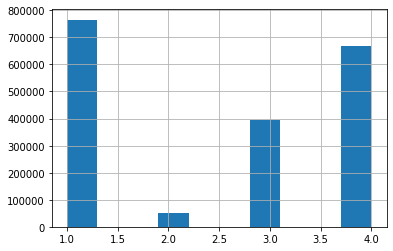

In [39]:
df_users["grav"].hist()

<p>to simplify things we can change value of "grav" to 0 and 1</p>
<p> 0 mean  No accident </p>
<p> 1 mean accident </p>

In [40]:
df_users = df_users.replace(1,0)
df_users = df_users.replace(4,0)
df_users = df_users.replace(2,1)
df_users = df_users.replace(3,1)

<AxesSubplot:>

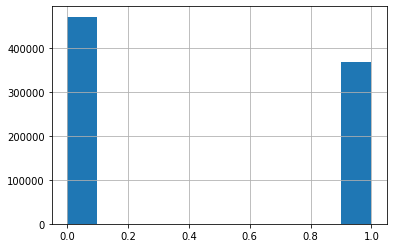

In [41]:
df_users = df_users.groupby(['Num_Acc'], as_index=False).max()
df_users.grav.hist()

In [42]:
df_users.count()

Num_Acc    839985
grav       839985
dtype: int64

In [43]:
df_users.head()

,Num_Acc,grav
0,200500000001,1
1,200500000002,1
2,200500000003,1
3,200500000004,1
4,200500000005,1


### 3- Places :

In [44]:
df_places.describe()

,Num_Acc,catr,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,8.399850e+05,839984.000000,332816.000000,839187.000000,838195.000000,414770.000000,413463.000000,838345.000000,838924.000000,838909.000000,830440.000000,831706.000000,838968.000000,838707.000000,838983.000000,838709.000000
mean,2.010011e+11,3.418247,0.068575,1.855246,2.039593,109.701206,276.792763,0.130675,1.135474,1.198732,5.256996,58.389998,1.257012,0.438958,1.147201,37.916588
std,3.458009e+08,1.207917,0.567640,0.720949,1.550779,499.309309,357.941312,0.555434,0.620295,0.722200,21.801291,62.527755,0.954748,1.350905,0.722495,47.979898
min,2.005000e+11,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-81.000000,0.000000,0.000000,0.000000,0.000000
25%,2.007000e+11,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.010000e+11,4.000000,0.000000,2.000000,2.000000,6.000000,100.000000,0.000000,1.000000,1.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000
75%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,28.000000,500.000000,0.000000,1.000000,1.000000,0.000000,80.000000,1.000000,0.000000,1.000000,99.000000
max,2.016001e+11,9.000000,9.000000,4.000000,99.000000,9900.000000,9540.000000,3.000000,4.000000,4.000000,960.000000,999.000000,9.000000,7.000000,5.000000,99.000000


In [45]:
df_places = df_places.drop(["v1", "voie", "v2", "pr", "pr1", "vosp", "prof", "plan", "lartpc", "larrout", "situ", "env1", "nbv"], axis = 1)
df_places.head()

,Num_Acc,catr,circ,surf,infra
0,201600000001,3.0,2.0,1.0,0.0
1,201600000002,3.0,1.0,1.0,0.0
2,201600000003,3.0,2.0,2.0,0.0
3,201600000004,4.0,2.0,1.0,0.0
4,201600000005,4.0,0.0,1.0,0.0


##### 3-A- Clean "catr" column :

In [46]:
set(df_places["catr"].unique())

{nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0}

In [47]:
df_places["catr"].isna().sum()

1

we have one NaN value so we change it to value 9 mean other road 

In [48]:
df_places["catr"] = df_places["catr"].replace(np.NaN, 9)

In [49]:
df_places["catr"] = df_places["catr"].astype(int)

In [50]:
set(df_places["catr"].unique())

{1, 2, 3, 4, 5, 6, 9}

##### 3-B- Clean "surf" column : 

In [51]:
set(df_places["surf"].unique())

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan}

In [52]:
np.median(df_places[~df_places["surf"].isna()].surf)

1.0

In [53]:
df_places["surf"] = df_places["surf"].fillna(1)

In [54]:
df_places["surf"] = df_places["surf"].replace(0, 1)

In [55]:
df_places["surf"] = df_places["surf"].astype(int)

In [56]:
set(df_places["surf"].unique())

{1, 2, 3, 4, 5, 6, 7, 8, 9}

##### 3-C-Clean "infra" column : 

In [57]:
set(df_places["infra"].unique())

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan}

In [58]:
(df_places["infra"] == 0).sum()

747965

In [59]:
df_places["infra"].isna().sum()

1278

<AxesSubplot:>

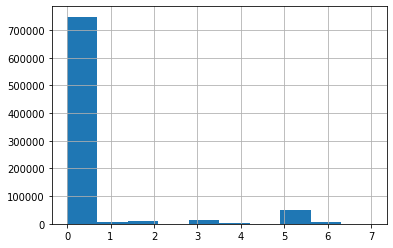

In [60]:
df_places["infra"].hist()

Remark we have several zero in this column so we drop it 

In [61]:
df_places = df_places.drop(["infra"], axis = 1)

#####  3-D- Clean "circ" column : 

In [62]:
set(df_places["circ"].unique())

{0.0, 1.0, 2.0, 3.0, 4.0, nan}

In [63]:
df_places[~df_places["circ"].isnull()].circ

0         2.0
1         1.0
2         2.0
3         2.0
4         0.0
         ... 
839980    2.0
839981    2.0
839982    1.0
839983    2.0
839984    3.0
Name: circ, Length: 839187, dtype: float64

In [64]:
np.median(df_places[~df_places["circ"].isnull()].circ)

2.0

In [65]:
df_places["circ"] = df_places["circ"].replace(np.NaN, 2)

In [66]:
df_places["circ"] = df_places["circ"].replace(0, 2)

In [67]:
df_places["circ"] = df_places["circ"].astype(int)

In [68]:
set(df_places["circ"].unique())

{1, 2, 3, 4}

<AxesSubplot:>

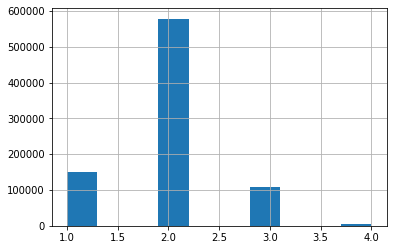

In [69]:
df_places["circ"].hist()

# Merge Data 

<h3>merge caracteristics table with users table :<h3>

In [70]:
datamerge = pd.merge(df_caracteristics, df_places, how="outer", on="Num_Acc")
datamerge.describe()

,Num_Acc,an,mois,jour,hrmn,lum,int,atm,catr,circ,surf
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,13.559365,1.912588,0.286116,1.547080,3.418254,1.961471,1.288842
std,3.458009e+08,3.458059,3.389489,8.750201,5.411096,1.517900,0.451944,1.587622,1.207931,0.571444,0.927817
min,2.005000e+11,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,10.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,14.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,18.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000
max,2.016001e+11,16.000000,12.000000,31.000000,23.000000,5.000000,1.000000,9.000000,9.000000,4.000000,9.000000


In [71]:
data = pd.merge(datamerge, df_users, how="outer", on="Num_Acc")
data.describe()

,Num_Acc,an,mois,jour,hrmn,lum,int,atm,catr,circ,surf,grav
count,8.399850e+05,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000,839985.000000
mean,2.010011e+11,10.011129,6.679437,15.594687,13.559365,1.912588,0.286116,1.547080,3.418254,1.961471,1.288842,0.438448
std,3.458009e+08,3.458059,3.389489,8.750201,5.411096,1.517900,0.451944,1.587622,1.207931,0.571444,0.927817,0.496197
min,2.005000e+11,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.007000e+11,7.000000,4.000000,8.000000,10.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,0.000000
50%,2.010000e+11,10.000000,7.000000,15.000000,14.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1.000000,0.000000
75%,2.013000e+11,13.000000,10.000000,23.000000,18.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000
max,2.016001e+11,16.000000,12.000000,31.000000,23.000000,5.000000,1.000000,9.000000,9.000000,4.000000,9.000000,1.000000


In [72]:
data.head(10)

,Num_Acc,an,mois,jour,hrmn,lum,int,atm,catr,circ,surf,grav
0,201600000001,16,2,1,14,1,0,8,3,2,1,1
1,201600000002,16,3,16,18,1,1,1,3,1,1,1
2,201600000003,16,7,13,19,1,0,1,3,2,2,1
3,201600000004,16,8,15,19,2,0,7,4,2,1,1
4,201600000005,16,12,23,11,1,1,1,4,2,1,1
5,201600000006,16,12,23,11,1,0,7,3,2,1,1
6,201600000007,16,5,1,11,1,0,7,3,2,1,0
7,201600000008,16,5,14,19,2,0,1,3,2,1,1
8,201600000009,16,9,23,19,1,0,1,4,2,1,1
9,201600000010,16,12,30,10,1,0,9,4,2,7,1


# visualization 

### correlation : 

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

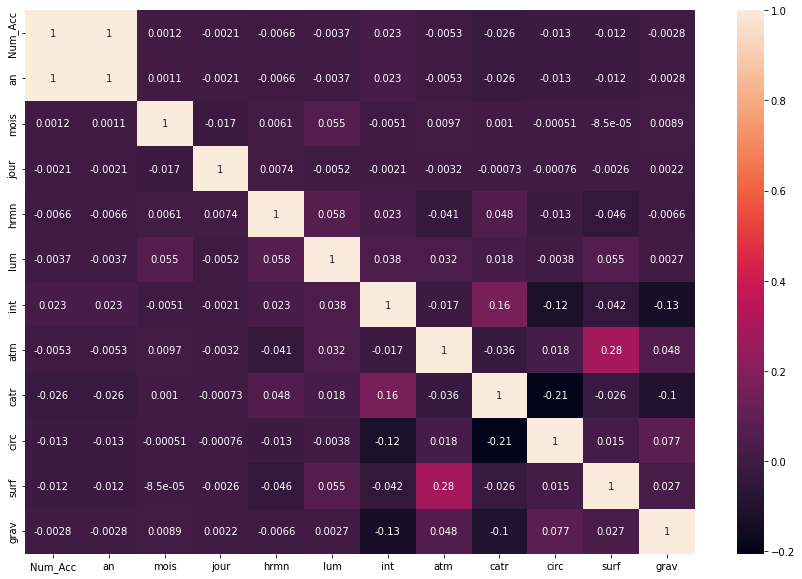

In [74]:
fig= plt.figure(figsize=(15,10))
ax1=plt.subplot()
sns.heatmap(data.corr(), annot=True)

### Graph 1 : number of accidenrt by lighting conditions :

lum
1    576861
2     49140
3     65811
4      6894
5    141279
Name: Num_Acc, dtype: int64


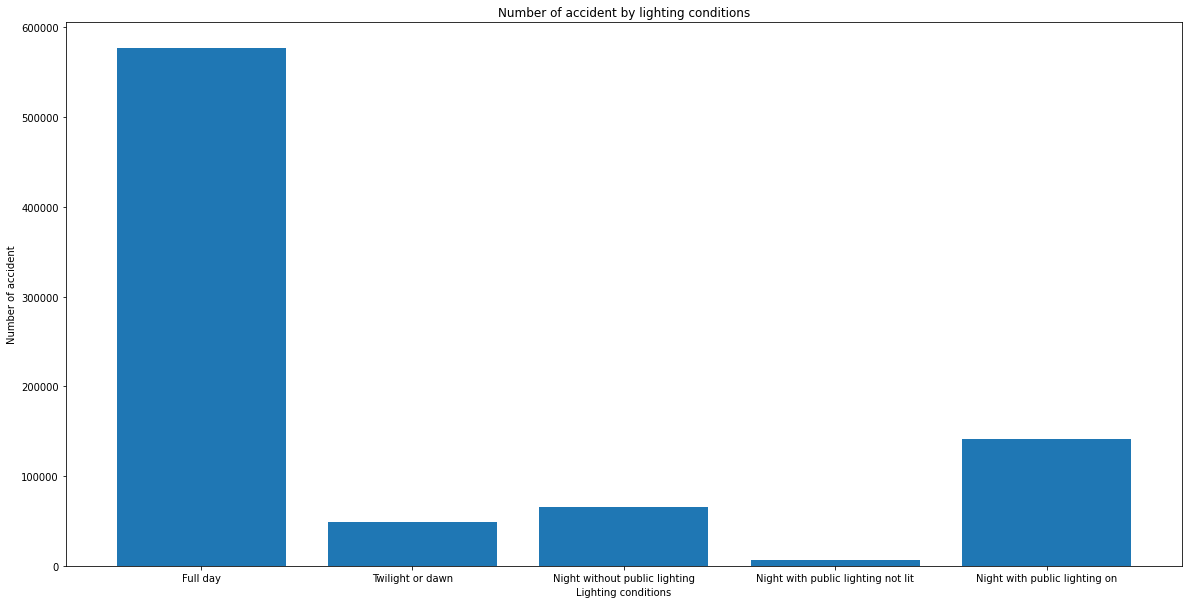

In [75]:
plt.figure(figsize=(20,10))
graph = data.groupby('lum')['Num_Acc'].count()
print(graph)
labels = ['Full day', 'Twilight or dawn', 'Night without public lighting', 'Night with public lighting not lit', 'Night with public lighting on']
plt.xticks(range(len(graph)), labels)
plt.xlabel('Lighting conditions')
plt.ylabel('Number of accident')
plt.bar(range(len(graph)), graph) 
plt.title("Number of accident by lighting conditions")
plt.show()

### Graph 2 : number of accidenrt by road category :

catr
1     61077
2     67918
3    262690
4    425061
5      1634
6      5520
9     16085
Name: Num_Acc, dtype: int64


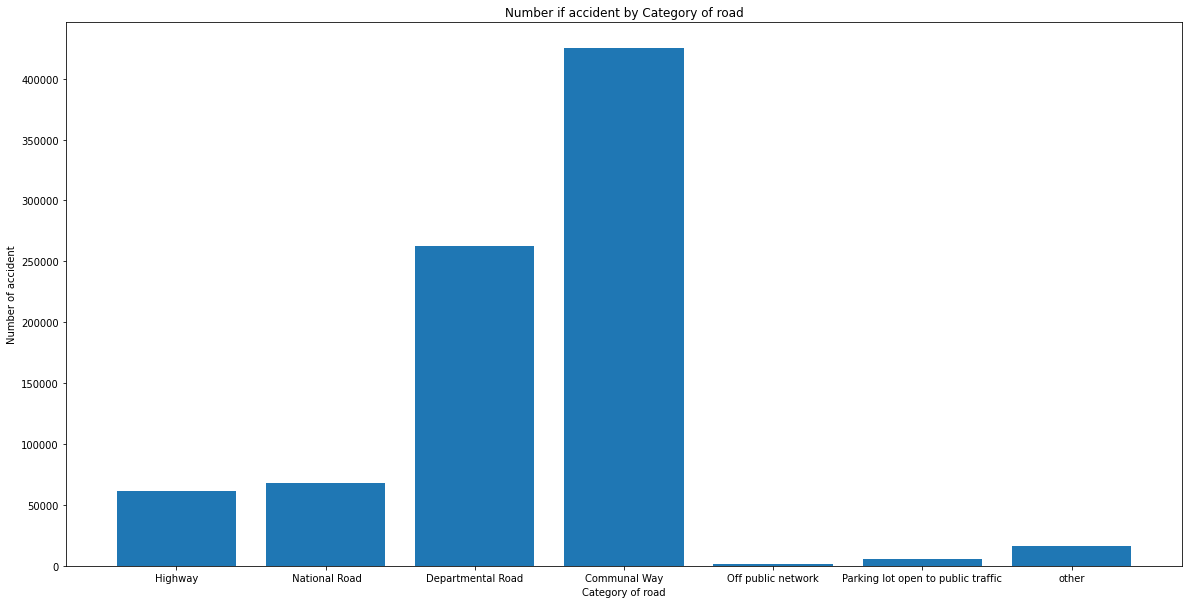

In [76]:
plt.figure(figsize=(20,10))
graph = data.groupby('catr')['Num_Acc'].count()
print(graph)
labels = ['Highway', ' National Road', 'Departmental Road', 'Communal Way', 'Off public network', 'Parking lot open to public traffic', 'other']
plt.xticks(range(len(graph)), labels)
plt.xlabel('Category of road')
plt.ylabel('Number of accident')
plt.bar(range(len(graph)), graph) 
plt.title("Number if accident by Category of road")
plt.show()

### Graph 3 : number of accidenrt by years :

an
5     87026
6     82993
7     83850
8     76767
9     74409
10    69379
11    66974
12    62250
13    58397
14    59854
15    58654
16    59432
Name: Num_Acc, dtype: int64


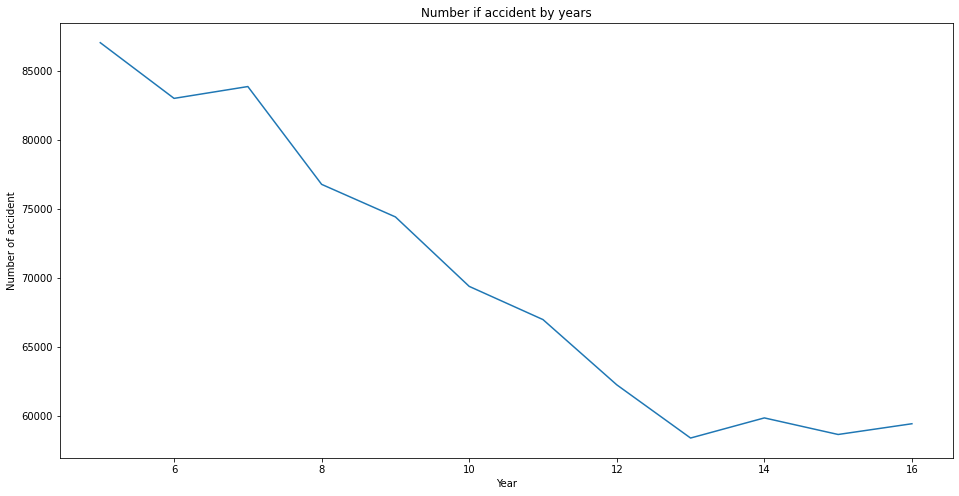

In [77]:
df_acc_an=data.groupby('an')["Num_Acc"].count()
print(df_acc_an)
plt.figure(figsize=(16,8))
plt.xlabel('Year')
plt.ylabel('Number of accident')
plt.title("Number if accident by years")
plt.plot(df_acc_an)

### Graph 4 : number of accidenrt by traffic regime : 

circ
1    149375
2    578177
3    107855
4      4578
Name: Num_Acc, dtype: int64


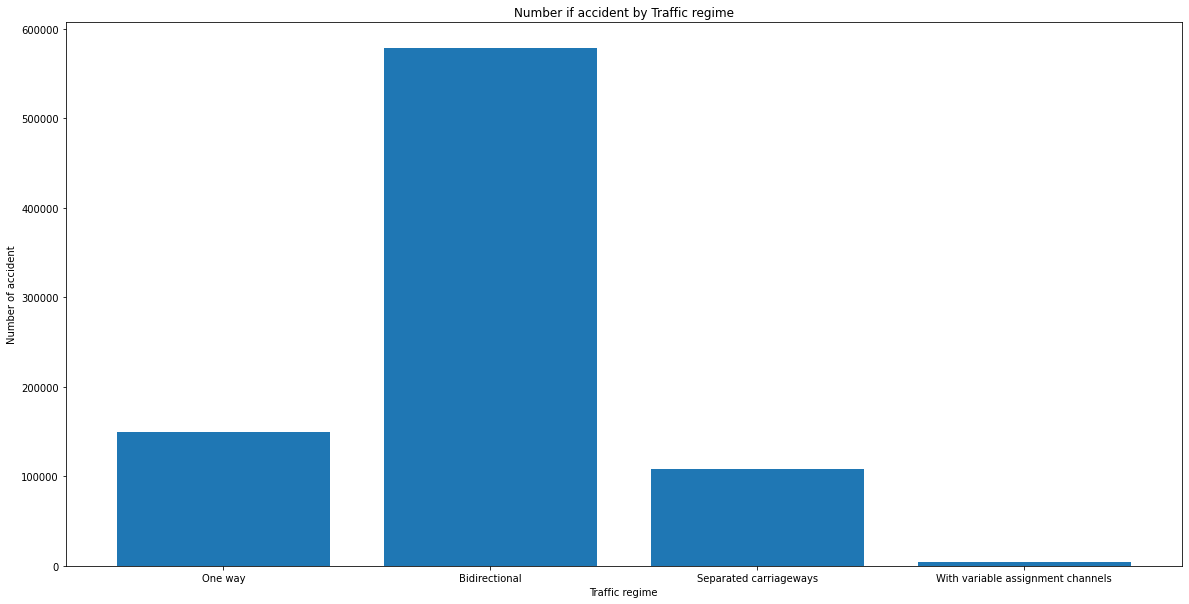

In [78]:
plt.figure(figsize=(20,10))
graph = data.groupby('circ')['Num_Acc'].count()
print(graph)
labels = ['One way', 'Bidirectional', 'Separated carriageways', 'With variable assignment channels']
plt.xticks(range(len(graph)), labels)
plt.xlabel('Traffic regime')
plt.ylabel('Number of accident')
plt.bar(range(len(graph)), graph) 
plt.title("Number if accident by Traffic regime")
plt.show()

### Split data : 

In [79]:
y= data['grav'] 
X= data[['hrmn','lum','int','atm','catr','circ','surf']]

In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839985 entries, 0 to 839984
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   hrmn    839985 non-null  int64
 1   lum     839985 non-null  int64
 2   int     839985 non-null  int64
 3   atm     839985 non-null  int64
 4   catr    839985 non-null  int64
 5   circ    839985 non-null  int64
 6   surf    839985 non-null  int64
dtypes: int64(7)
memory usage: 51.3 MB


In [81]:
X

,hrmn,lum,int,atm,catr,circ,surf
0,14,1,0,8,3,2,1
1,18,1,1,1,3,1,1
2,19,1,0,1,3,2,2
3,19,2,0,7,4,2,1
4,11,1,1,1,4,2,1
...,...,...,...,...,...,...,...
839980,20,5,1,1,4,2,1
839981,10,1,0,1,4,2,1
839982,17,1,1,1,4,1,1
839983,15,1,1,2,4,2,1


### Standardization : 

In [82]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scaler=Scaler.fit_transform(X)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.40, random_state=42)

In [84]:
X_train.shape

(503991, 7)

In [85]:
X_test.shape

(335994, 7)

In [86]:
y_train.value_counts()

0    282706
1    221285
Name: grav, dtype: int64

In [87]:
y_test.value_counts()

0    188989
1    147005
Name: grav, dtype: int64

[282706, 221285]


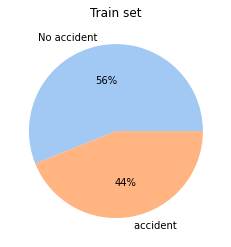

In [88]:
print([y_train.value_counts()[0],  y_train.value_counts()[1]])
colors = sns.color_palette('pastel')[0:5]
plt.pie([y_train.value_counts()[0],  y_train.value_counts()[1]] , labels = ["No accident","accident "], colors = colors, autopct='%.0f%%')
plt.title("Train set")
plt.show()

[188989, 147005]


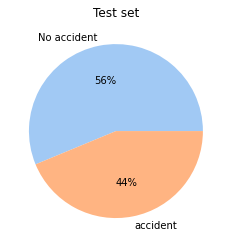

In [89]:
print([y_test.value_counts()[0],  y_test.value_counts()[1]])
colors = sns.color_palette('pastel')[0:5]
plt.pie([y_test.value_counts()[0],  y_test.value_counts()[1]] , labels = ["No accident","accident"], colors = colors, autopct='%.0f%%')
plt.title("Test set")
plt.show()

# Algorithms 

we test diffent algoritms for choice model

In [90]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### Random Forest : 

In [91]:
t0=time.time()
model_rf= RandomForestClassifier()
model_rf.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
y_pred_rf = model_rf.predict(X_test)
score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy :',score_rf)

Time taken : 61.30238652229309
Accuracy : 0.6751281272879873


### K-Neighbors Classifier : 

In [92]:
t0=time.time()
model_knn= KNeighborsClassifier()
model_knn.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
y_pred_knn = model_knn.predict(X_test)
score_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy :',score_knn)

Time taken : 0.8997983932495117
Accuracy : 0.6318862836836372


### Logistic Regression algorithm :

In [93]:
t0=time.time()
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
print('Time taken :' , time.time()-t0)
y_pred_lr = model_lr.predict(X_test)
score_lr = accuracy_score(y_test,y_pred_lr)
print('Accuracy :',score_lr)

Time taken : 0.6242051124572754
Accuracy : 0.5628136216718156


# Evaluation 

###  find best params :

In [94]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [95]:
params_rf = {'n_estimators' : [100, 200], 'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8]}
params_knn= {'n_neighbors' : [1, 5, 11, 19], 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan']}
params_lr={ 'penalty' : ['l1', 'l2'], 'class_weight' : ['dict', 'balanced']}

In [96]:
def evaluate_model(model,param,x_train,y_train):
    gs = GridSearchCV(estimator = model, param_grid = param, cv = 5)
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    matrics = plot_confusion_matrix(gs,x_train, y_train,values_format='d' )
    return gs.best_params_ ,score,matrics

### Random Forest : 

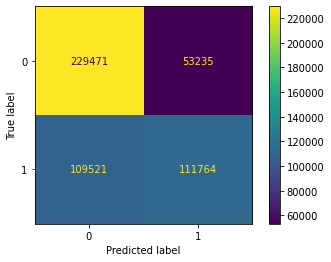

In [97]:
best_param_rf, score_rf, Mat = evaluate_model(model_rf, params_rf,X_train,y_train)

In [98]:
best_param_rf

{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}

In [99]:
score_rf

0.6774079299035102

### K-Neighbors Classifier : 

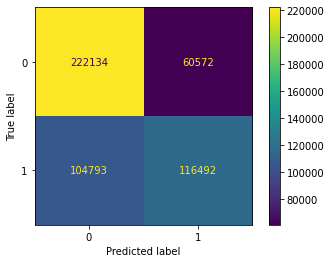

In [100]:
best_param_knn, score_knn, Mat = evaluate_model(model_knn, params_knn,X_train,y_train)

In [101]:
best_param_knn

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [102]:
score_knn

0.6666160705250689

### Logistic Regression algorithm :

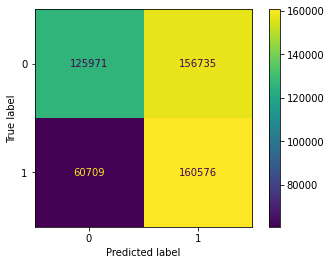

In [103]:
best_param_lr, score_lr, Mat = evaluate_model(model_lr, params_lr,X_train,y_train)

In [104]:
best_param_lr

{'class_weight': 'balanced', 'penalty': 'l2'}

In [105]:
score_lr

0.5676232313672268